# Deep Learning Project - NLP

### Understanding Semantic relationship by developing Word embeddings with Gensim using [Word2Vector text processing algorithm](https://radimrehurek.com/gensim/models/word2vec.html) in NLP on IMDB Movie review dataset.

This project dives on a more advanced level in NLP Deep-Learning framework by developing semantic relationships between words as applied on IMDB Movie review dataset. As in another [project](https://github.com/niveditphoenix/DataScience_Projects_Portfolio/blob/master/Deep%20Learning%20Projects%20Using%20Tensorflow%20%26%20KERAS/Sentiment_Analysis_NLP_DaVinci_TensorflowTokenizer_DNN.ipynb), we used Tokenizer to have number representation of words to predict sentiment, though, it lacks in translating these words into a pure mathematical equation which machine can understand.

In this project, we will establish embeddings of each word in vocabulary with fixed size, which is 50 in this case. Thus, each word will be represented by set of 50 numbers in matrix to form the sematic relationships with other words in terms of Cosine-Distance.

It is possible by applying Gensim library which comprises of [Word2Vector algorithm](https://radimrehurek.com/gensim/models/word2vec.html).

In simple language, we shall try to find a popular example i.e. : **King + Man = Queen + Woman**, same as like we deal with numbers.

Using Principal-Component-Analysis, we will visualize how words are related basis this trained model.

Also, we will check here to use pre-trained [Google's Word2Vec model](https://code.google.com/archive/p/word2vec/). This model is pre-trained by Google on news data containing 3 million words and phrases represented in 300 dimensional embedding word-vectors. It's around 1.53 GB zipped file, click [here](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) to download.

** Approach**
1. Load Gensim with other dependencies
2. Load Input Data
3. Data Cleaning & Processing
4. Getting all words in a list from each review
5. Model building
6. Exploring Model
7. Visualize Word Embedding using PCA with 2 vectors
8. Loading Google's Pre-Trained Word2Vec and exploring it

Let's roll the excitement...!

## 1. Load Gensim with other dependencies

In [1]:
import gensim
import pandas as pd
import os

C:\Users\Nivedit\Anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 2. Load Input Data

Click [here](https://github.com/niveditphoenix/DataScience_Projects_Portfolio/raw/master/Deep%20Learning%20Projects%20Using%20Tensorflow%20%26%20KERAS/NLP/unlabeledTrainData.tsv.zip) to download IMDB-Movie-Review CSV Input file

In [2]:
path = r"C:\Users\Nivedit\CreativeSpace\myWork\Github_Projects\DL\IMDB_Gensim_Word_Embedding\IMDB_Movie_Rating_Sentiment_NLP_DL"
df = pd.read_csv(os.path.join(path, "unlabeledTrainData.tsv.zip"), header = 0, delimiter = "\t", quoting=3)

In [27]:
print(df.shape)
df.sample(6)

(50000, 3)


,id,review,clean_review
39597,"""6273_0""","""As a movie viewer that loves strange and offb...",as movie viewer that loves strange and offbeat...
46238,"""9615_0""","""Delta Force 3 is your typical mindless action...",delta force is your typical mindless action fe...
23301,"""43877_0""","""'Blue City' was nearly a contender in all cat...",blue city was nearly contender in all categori...
8498,"""11410_0""","""Hard to fault a Clint Eastwood movie; he is s...",hard to fault clint eastwood movie he is so ve...
46101,"""44678_0""","""Let me start off by saying that I feel like I...",let me start off by saying that feel like ve l...
46883,"""16672_0""","""I remember the week I saw Casablanca and Play...",remember the week saw casablanca and play it a...


## 3. Data Cleaning

In review, text is not cleaned and includes various irrelevant characters which needs to be cleaned

In [4]:
import re

In [5]:
def clean_data(string):
    try:
        string = re.sub(r'^https?:\/\/<>.*[\r\n]*', '', string, flags = re.MULTILINE)
        string = re.sub(r'[^A-Za-z]'," ", string)
        words = string.strip().lower().split()
        words = [w for w in words if len(w) > 1]
        return " ".join(words)
    except:
        return ""

In [6]:
df['clean_review'] = df.review.apply(clean_data)
df.head()

,id,review,clean_review
0,"""9999_0""","""Watching Time Chasers, it obvious that it was...",watching time chasers it obvious that it was m...
1,"""45057_0""","""I saw this film about 20 years ago and rememb...",saw this film about years ago and remember it ...
2,"""15561_0""","""Minor Spoilers<br /><br />In New York, Joan B...",minor spoilers br br in new york joan barnard ...
3,"""7161_0""","""I went to see this film with a great deal of ...",went to see this film with great deal of excit...
4,"""43971_0""","""Yes, I agree with everyone on this site this ...",yes agree with everyone on this site this movi...


## 4. Converting each Review to a Word-List before feeding into a Word-Vector

In [7]:
document = []

for each_review in df.clean_review:
    document.append(each_review.split(" "))

In [28]:
print(len(document))
document[1]

50000


['saw',
 'this',
 'film',
 'about',
 'years',
 'ago',
 'and',
 'remember',
 'it',
 'as',
 'being',
 'particularly',
 'nasty',
 'believe',
 'it',
 'is',
 'based',
 'on',
 'true',
 'incident',
 'young',
 'man',
 'breaks',
 'into',
 'nurses',
 'home',
 'and',
 'rapes',
 'tortures',
 'and',
 'kills',
 'various',
 'women',
 'br',
 'br',
 'it',
 'is',
 'in',
 'black',
 'and',
 'white',
 'but',
 'saves',
 'the',
 'colour',
 'for',
 'one',
 'shocking',
 'shot',
 'br',
 'br',
 'at',
 'the',
 'end',
 'the',
 'film',
 'seems',
 'to',
 'be',
 'trying',
 'to',
 'make',
 'some',
 'political',
 'statement',
 'but',
 'it',
 'just',
 'comes',
 'across',
 'as',
 'confused',
 'and',
 'obscene',
 'br',
 'br',
 'avoid']

In [9]:
for i in range(0,5):
    print(len(document[i]))

84
77
257
181
223


## 5. Building the Model

In [10]:
models = gensim.models.Word2Vec(document,        # Word List from this Moview Review
                                min_count = 10,  # Ignoring all words with total frequency less than this
                                workers = 4,     # No. of CPU
                                size = 50,       # Embedding Size or Number of Neurons in Hidden Layer
                                window = 5,      # Window size i.e. distance b/w target and predicted word
                                iter = 10        # Nr. of iterations over text corpus
                               )

## 6. Exploring this Model

### 6.1: How many words in this model and how many features

In [11]:
models.wv.syn0.shape

(28296, 50)

Total **28296 Unique Words** with **50** being Embedding Size for each word

### 6.2: Check embedding for few words

In [12]:
for i in ['corners', 'mission', 'catastrophe']:
    print(i)
    print(models.wv[i].shape)
    print(models.wv[i])
    print("\n")

corners
(50,)
[-0.39633673  0.44438666  0.89777535  0.44823208  1.1148375   0.10569822
  0.6082293  -0.7593212  -0.11106801 -0.1627698   0.8137228   0.17379336
 -0.76712847 -0.24044259 -0.2737206  -0.0738972   0.40022326  0.6022987
 -0.11943179 -0.3509242  -0.06732462 -0.31447652 -0.0326987   0.42322806
  0.7605826  -0.7533247  -0.2905929   0.03535109 -0.560234   -0.12012697
 -0.7553748   0.7759355  -0.21933877 -0.6855406  -0.5031187   1.2833363
 -1.4988877   0.13597758 -0.16434838  0.31306145  0.03776871 -0.3210004
  1.1199927   0.63208985  0.23819675  0.79684705 -0.04965817 -0.19406804
  0.46531805  0.15397145]


mission
(50,)
[ 1.3449875  -4.7788877  -0.97999185 -0.06148221  1.0675834   0.997927
 -1.0350229  -2.0736113  -0.9129141   2.8125808  -3.7255032   3.3612082
 -4.1711884   0.34536913 -1.6710721  -2.5815973  -2.2389278  -0.301874
  0.96714693 -1.4479188  -0.58798414  0.53387904 -1.1217304  -1.5334201
  0.02495835 -1.4147192  -0.23628467  3.1306515   2.7776928  -0.8262733
  0.5

### 6.3: Checking similarity within words which is the [Cosine Distance](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/)

In [13]:
print(models.similarity('france', 'spain'))
print(pd.DataFrame(models.wv.most_similar('france')))

0.903036533297916
         0         1
0    spain  0.903037
1    italy  0.894695
2  england  0.874963
3    india  0.867579
4   europe  0.852389
5  austria  0.850607
6  germany  0.837261
7   greece  0.830938
8    china  0.830494
9   mexico  0.821382


C:\Users\Nivedit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [14]:
print(len(models.wv.most_similar('awful')))
print(pd.DataFrame(models.wv.most_similar('awful')))

10
            0         1
0    horrible  0.916432
1    terrible  0.914484
2      horrid  0.898579
3    dreadful  0.864051
4   atrocious  0.858949
5   appalling  0.841604
6  horrendous  0.838597
7     abysmal  0.830067
8       lousy  0.821724
9         bad  0.786493


### 6.4: Finding the word that doesn't match

In [15]:
models.wv.doesnt_match('man woman child corners'.split())

'corners'

1. Equation -> king + man = queen + ?
2. Here it might not be enough data for this question

In [16]:
models.most_similar(positive=['king','man'], negative=['queen'])

C:\Users\Nivedit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('joker', 0.5858485102653503),
 ('batman', 0.5770583748817444),
 ('himself', 0.565791666507721),
 ('bookie', 0.5232667326927185),
 ('ness', 0.5195457935333252),
 ('mastermind', 0.5087444186210632),
 ('scientist', 0.501668393611908),
 ('tong', 0.4956737756729126),
 ('soldier', 0.48960307240486145),
 ('golgo', 0.48884761333465576)]

Storing this in an Object so as to save memory

In [17]:
word2_vec = models.wv

In [18]:
# Getting Vocabulary as we got from this model and store in list
words = list(word2_vec.vocab)
len(words)
words[:10]

['watching',
 'time',
 'chasers',
 'it',
 'obvious',
 'that',
 'was',
 'made',
 'by',
 'bunch']

## 7. Visualize Word Embedding

In [19]:
X = models[word2_vec.vocab]

C:\Users\Nivedit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


### 7.1: Using PCA to convert this High-dimensional word-vectors into 2-D vectors to plot them on graph

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# For PCA with 2 Principal Component Vectors
pca = PCA(n_components=2)

In [22]:
# Fit and transform on X which is embedding for all Unique Words in Vocabulary
result = pca.fit_transform(X)

In [23]:
result.shape

(28296, 2)

In [24]:
result

array([[ 7.969088  , -0.4860724 ],
       [ 7.5594006 , -1.742764  ],
       [ 0.10338181,  0.24821894],
       ...,
       [-0.26446548,  0.23325507],
       [-0.15464874, -0.31300822],
       [ 0.01133692,  0.15355891]], dtype=float32)

### 7.2: Checking for all these PCA vectors as plotted

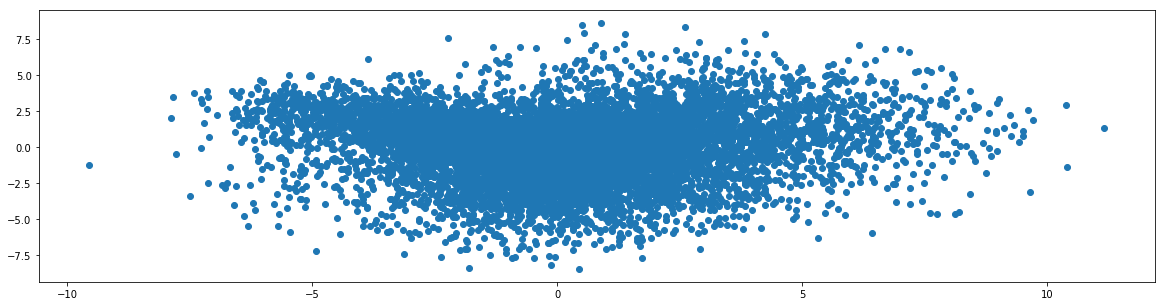

In [25]:
plt.figure(figsize=(20,5))
plt.scatter(x=result[:,0], y=result[:,1])

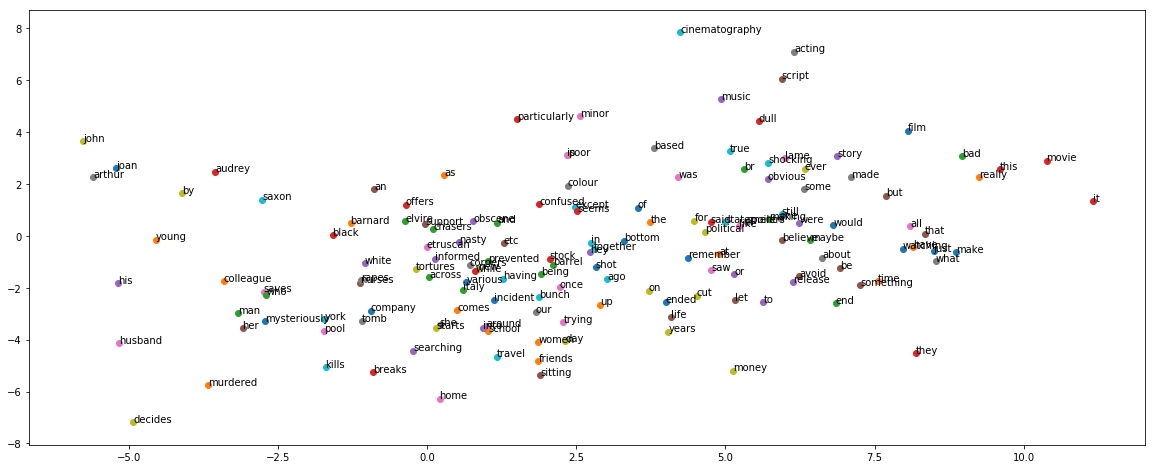

In [26]:
plt.figure(figsize=(20,8))

for i, word in enumerate(words[:150]):   # Plotting only till 150 Words to better understand the plottings
    plt.scatter(x=result[i,0], y=result[i,1])
    plt.annotate(word, xy=(result[i,0], result[i,1]))

plt.show()

### 7.4: Observations:
1. Near to Top-Right corner, words like **'music', 'script', 'acting', 'film', 'cinematography'** are close to each other
2. Similarly, near to Bottom-Left corner, words like **'kills', 'murdered'** are again close
3. Like this, there are various similar words close & words in opposite meanings are far
    - On bottom-left corner, words like **'man', 'husband', 'his'** are close while, **'women'** is far
    - **'black', 'white'** are seen placed near
    - **'travel', 'friends'** are also placed near

# 8. Loading Google's Word2Vec Pre-trained Word-Embedding
#### Trained on approx. 100 Billion Words from Google's News Data, to finally have 3 Million Words/Phrases with 300 as Embedding Size

In [29]:
filename = r"Z:/Career/DataScientist/Google_Word2Vec/GoogleNews-vectors-negative300.bin"

In [30]:
goog_w2v_model = gensim.models.KeyedVectors.load_word2vec_format(filename, binary=True)

In [31]:
# Checking count of total unique words whih sohuld be 3 million
len(goog_w2v_model.vocab)

3000000

In [32]:
goog_model = goog_w2v_model.wv

In [33]:
del(goog_w2v_model)

In [34]:
# Storing all these Unique words in a list
goog_vocab_list = list(goog_model.vocab)
goog_vocab_list[:10]

['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said']

In [35]:
# Just checking Embeddings for a random word
print(len(goog_model['phoenix']))
print(goog_model['phoenix'][:20])  # Checking first 20 embedding since toal count is 300

300
[ 0.30664062  0.16308594 -0.12988281  0.26171875  0.11132812  0.04443359
  0.26171875 -0.41210938  0.15234375  0.18554688 -0.04272461 -0.16503906
 -0.34960938  0.0546875  -0.234375   -0.02416992  0.16503906 -0.12109375
  0.02441406 -0.18066406]
